Part 1: DT Basics

1.Basic Description of the Data : The Diagnostic dataset provided is a multivariate dataset. The dataset is available on the UCI Machine Learning Repository.The dataset contains 569 instances and 30 features.

In [1]:
!pip install ucimlrepo

In [196]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
dataset = pd.concat([X, y], axis=1)
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


                  name     role         type demographic description units missing_values
0                   ID       ID  Categorical        None        None  None             no
1            Diagnosis   Target  Categorical        None        None  None             no
2              radius1  Feature   Continuous        None        None  None             no
3             texture1  Feature   Continuous        None        None  None             no
4           perimeter1  Feature   Continuous        None        None  None             no
5                area1  Feature   Continuous        None        None  None             no
6          smoothness1  Feature   Continuous        None        None  None             no
7         compactness1  Feature   Continuous        None        None  None             no
8           concavity1  Feature   Continuous        None        None  None             no
9      concave_points1  Feature   Continuous        None        None  None             no
10        

2.Classification Task:
The goal is to classify cancer tumors into two classes:
Malignant (M): Tumors that are cancerous and pose a threat to health.
Benign (B): Tumors that are non-cancerous and not harmful.



 Why Decision Tree:
 A decision tree is a suitable model for such Data Set because it can capture non-linear relationships in the diagnostic features and help identify critical tumor characteristics that contribute to distinguishing between malignant and benign cases, providing valuable insights for medical diagnosis.

In [3]:
dataset.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
dataset['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
#step 2 Convert Gender to number
print(dataset.shape)
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender=LabelEncoder()

(569, 31)


3. Data Visualization

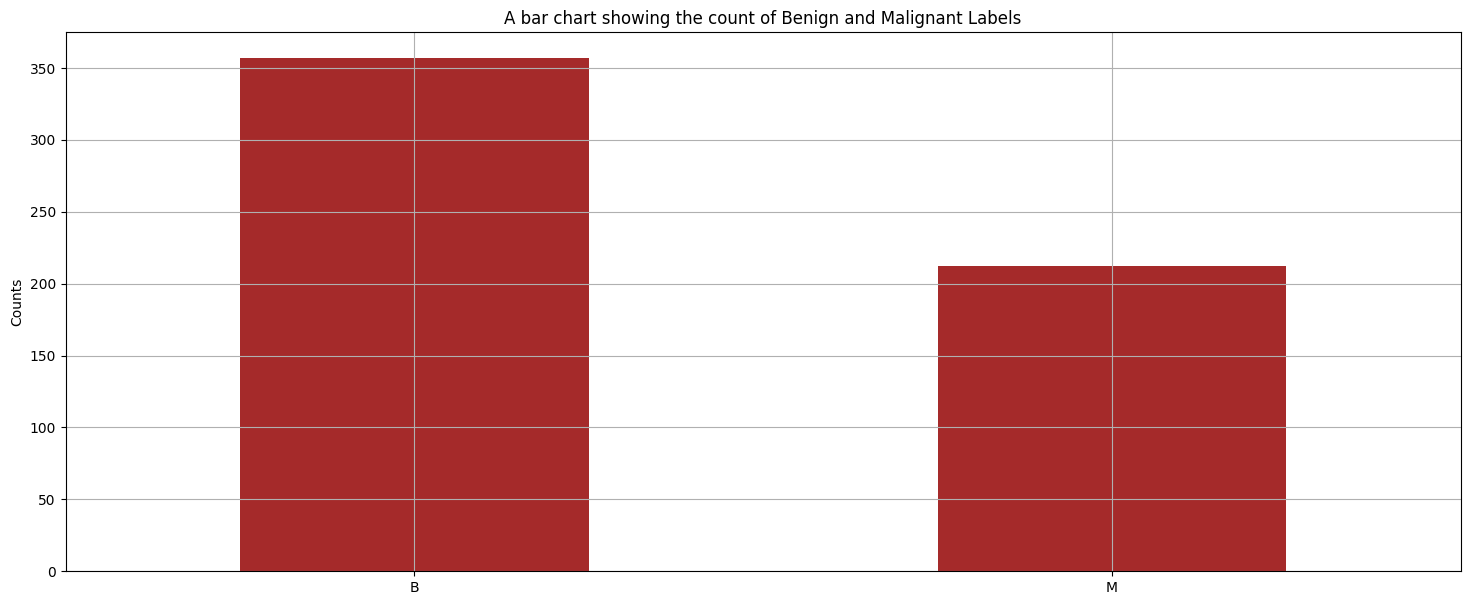

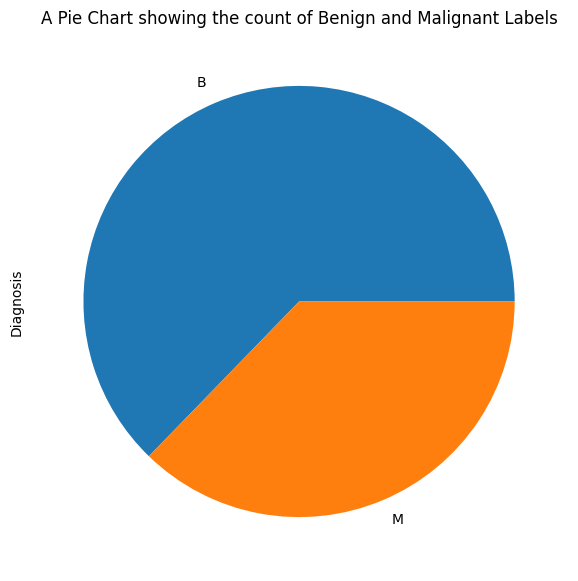

Number of Benign: 357
Number of Malignant: 212


In [6]:
# Getting the value count for the two labels in the diagnosis column
value_count = dataset['Diagnosis'].value_counts()

# Setting the figure size of the plot
plt.figure(figsize = (18, 7))

# Plotting the Count for the value counts in the diagnosis column
value_count.plot(kind = "bar", color = "brown", rot=0)
plt.ylabel("Counts")
plt.title("A bar chart showing the count of Benign and Malignant Labels")
plt.grid(True)
plt.show()

# Plotting a pie chart of the imbalanced dataset
value_count.plot(kind = "pie", figsize=(18, 7))
plt.title("A Pie Chart showing the count of Benign and Malignant Labels")
plt.show()

# Printing the number of counts for the values of the labels in the diagnosis column
B, M = value_count
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

For the plot above, we can see that the labels for the diagnosis which are B and M are not properly balanced

<ipython-input-7-eb946397a653>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


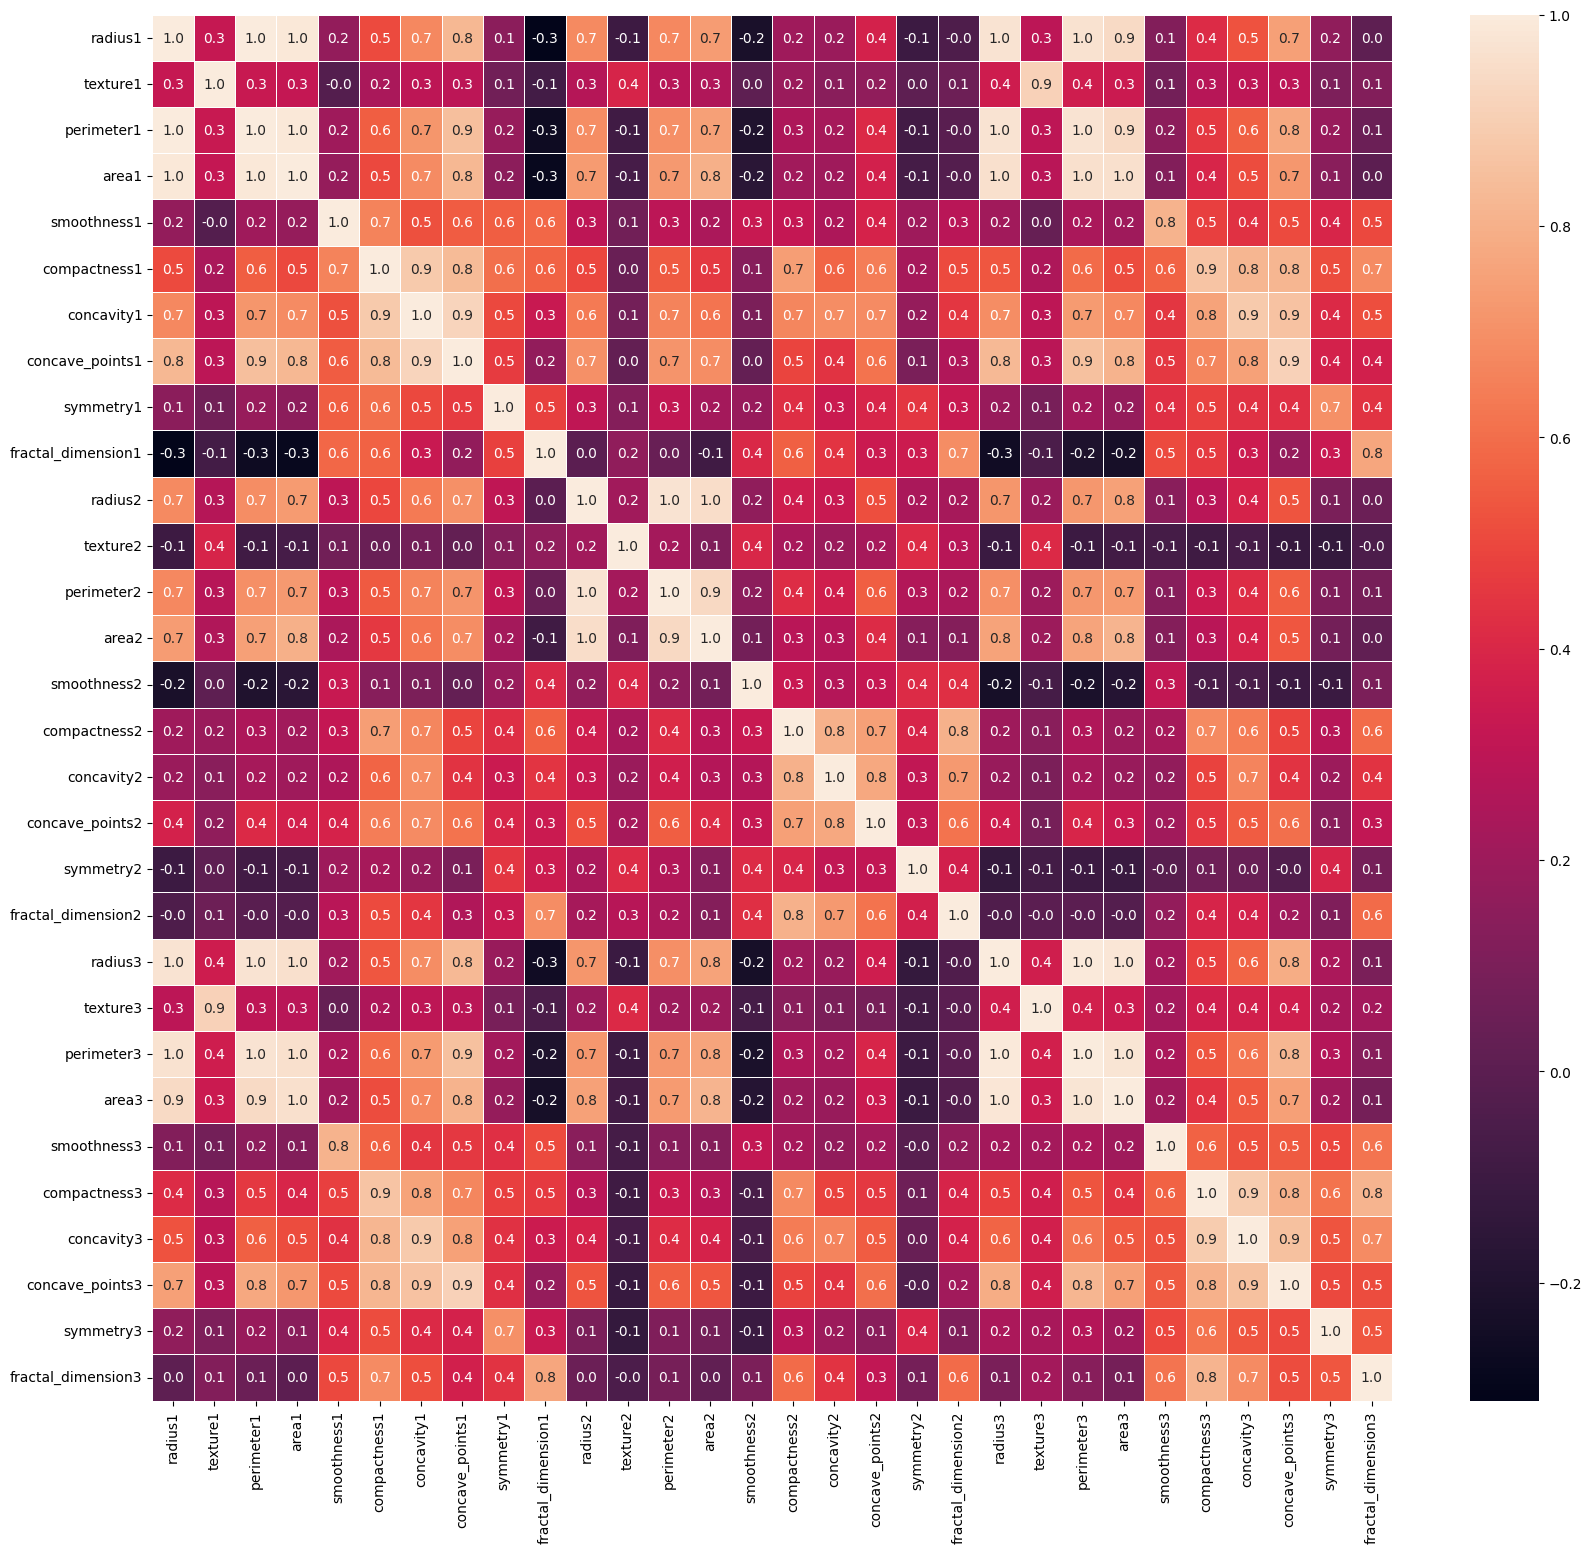

In [7]:
f,ax = plt.subplots(figsize=(20, 18))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Step 3 : Split data imto training and test set

In [8]:
#step 3 -Split Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

4. Fit a decision tree with the default parameters on 50% of the data

In [9]:
#step 4
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

5. Test it on 50% held out data and generate a classification report

In [10]:
#Step 5
y_pred = classifier.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy score : ",accuracy)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred, pos_label='B')
print("Precision Score: ", precision)
recall = recall_score(y_test, y_pred, pos_label='B')
print("Recall Score: ", recall)

Accuracy score :  0.9298245614035088
Precision Score:  0.9408602150537635
Recall Score:  0.9510869565217391


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(x_test)))

              precision    recall  f1-score   support

           B       0.94      0.95      0.95       184
           M       0.91      0.89      0.90       101

    accuracy                           0.93       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



6. Inspect the model by visualizing and interpreting the results

[[175   9]
 [ 11  90]]


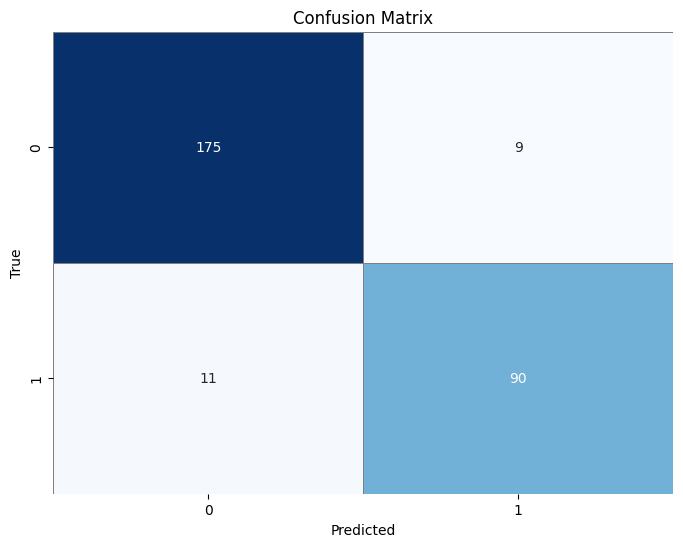

In [12]:
#step 6
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


7. Repeat with the entropy criterion. Does using the entropy criterion make a big
difference or small difference in the overall classifier?

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
y_pred = classifier.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy score : ",accuracy)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred, pos_label='B')
print("Precision Score: ", precision)
recall = recall_score(y_test, y_pred, pos_label='B')
print("Recall Score: ", recall)

Accuracy score :  0.9403508771929825
Precision Score:  0.946524064171123
Recall Score:  0.9619565217391305


As we can see from the accuracy entropy has very less effect on evaluation parameters such as accuracy ,precision and recall score

Part 2

Do an experiment to see how max_depth, min_values_split, or min_values_leaf impacts the model.

2.1Parameter Choice: max_depth

max_depth is an important hyperparameter for decision trees, as it controls the maximum depth of the tree. The depth of a decision tree directly impacts its complexity and ability to capture patterns in the data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

max_depths = [1,2,3, 5, 7, 10]

# Create a dictionary to store decision trees
decision_trees = {}

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, pos_label='B')
    print("Precision Score: ", precision)
    recall = recall_score(y_test, y_test_pred, pos_label='B')
    print("Recall Score: ", recall)
    # Store the decision tree and its performance metrics in the dictionary
    decision_trees[max_depth] = {
        'tree': clf,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall' :recall,
    }
# Print the results
for max_depth, tree_info in decision_trees.items():
    print(f"max_depth = {max_depth}, Train Accuracy = {tree_info['train_accuracy']:.4f}, Test Accuracy = {tree_info['test_accuracy']:.4f}")

# You can access the decision tree for a specific max_depth like this:
# tree_for_max_depth_5 = decision_trees[5]['tree']


Precision Score:  0.8984771573604061
Recall Score:  0.9619565217391305
Precision Score:  0.9179487179487179
Recall Score:  0.9728260869565217
Precision Score:  0.9040404040404041
Recall Score:  0.9728260869565217
Precision Score:  0.9270833333333334
Recall Score:  0.967391304347826
Precision Score:  0.9259259259259259
Recall Score:  0.9510869565217391
Precision Score:  0.9358288770053476
Recall Score:  0.9510869565217391
max_depth = 1, Train Accuracy = 0.9331, Test Accuracy = 0.9053
max_depth = 2, Train Accuracy = 0.9613, Test Accuracy = 0.9263
max_depth = 3, Train Accuracy = 0.9613, Test Accuracy = 0.9158
max_depth = 5, Train Accuracy = 0.9859, Test Accuracy = 0.9298
max_depth = 7, Train Accuracy = 1.0000, Test Accuracy = 0.9193
max_depth = 10, Train Accuracy = 1.0000, Test Accuracy = 0.9263


2.2,2.3

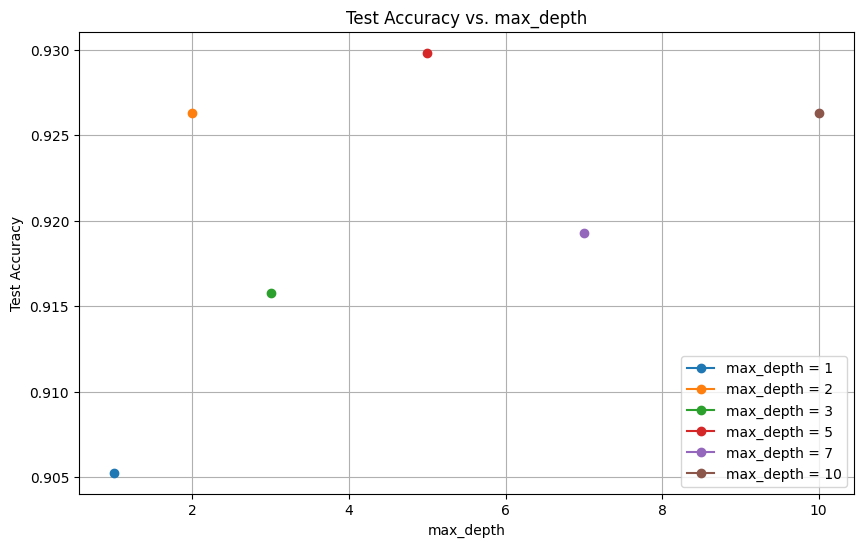

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create lists to store the max_depth values and corresponding test accuracies
max_depths = [max_depth for max_depth in decision_trees]
test_accuracies = [decision_trees[max_depth]['test_accuracy'] for max_depth in decision_trees]

plt.figure(figsize=(10, 6))
for max_depth in decision_trees:
    accuracy_values = [decision_trees[max_depth]['test_accuracy']]
    plt.plot([max_depth] * len(accuracy_values), accuracy_values, marker='o', label=f'max_depth = {max_depth}')

plt.xlabel('max_depth')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. max_depth')
plt.grid()
plt.legend()
plt.show()


2.4. Test and use at least 3 metrics to describe the performance, compiling your results into
a DataFrame

In [23]:
import pandas as pd

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(decision_trees, orient='index')

# Reset the index to have 'max_depth' as a column
df.reset_index(level=0, inplace=True)
print()
df = df.rename(columns={'index': 'max_depth'})

2.5.Plot and interpret your results

In [24]:
# Print the resulting DataFrame
# Set Pandas display options
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
print(df)


   max_depth                                  tree  train_accuracy  test_accuracy  precision    recall
0          1   DecisionTreeClassifier(max_depth=1)        0.933099       0.905263   0.898477  0.961957
1          2   DecisionTreeClassifier(max_depth=2)        0.961268       0.926316   0.917949  0.972826
2          3   DecisionTreeClassifier(max_depth=3)        0.961268       0.915789   0.904040  0.972826
3          5   DecisionTreeClassifier(max_depth=5)        0.985915       0.929825   0.927083  0.967391
4          7   DecisionTreeClassifier(max_depth=7)        1.000000       0.919298   0.925926  0.951087
5         10  DecisionTreeClassifier(max_depth=10)        1.000000       0.926316   0.935829  0.951087


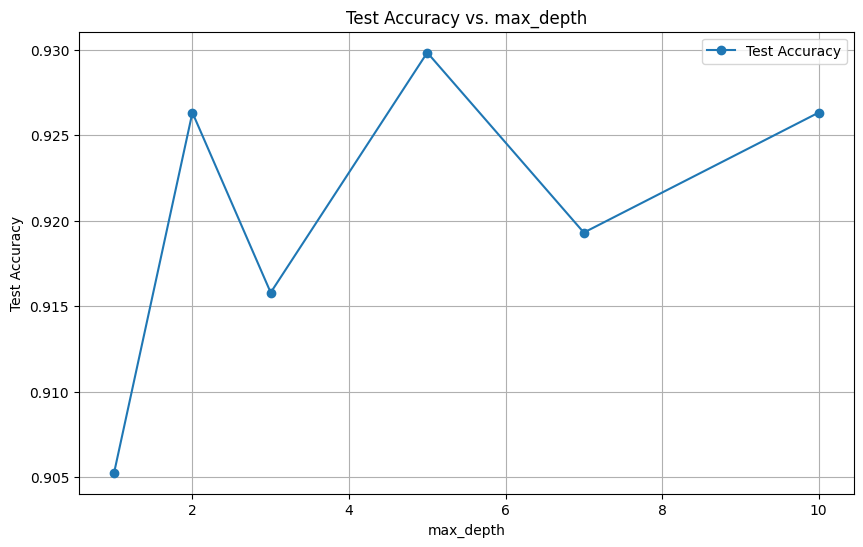

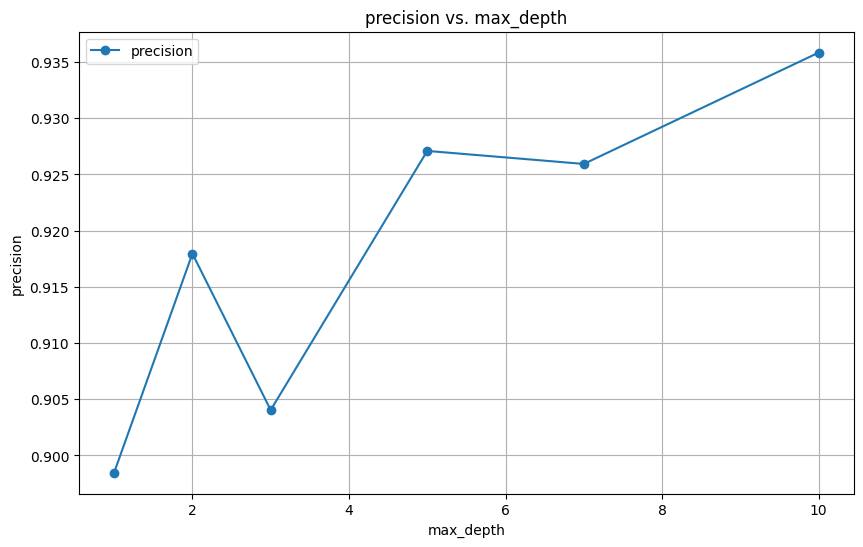

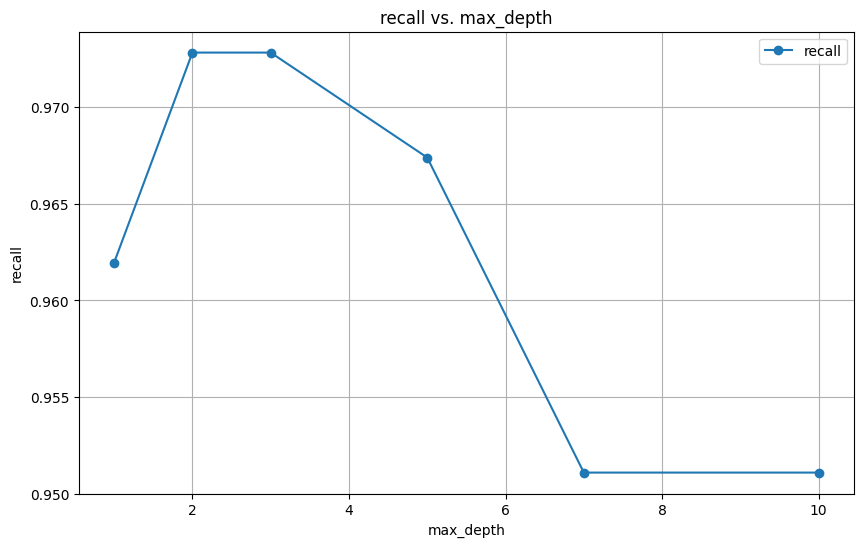

In [26]:
import matplotlib.pyplot as plt

# Plot Test Accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(df['max_depth'], df['test_accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. max_depth')
plt.grid()
plt.legend()
plt.show()


# Plot Test Accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(df['max_depth'], df['precision'], marker='o', label='precision')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.title('precision vs. max_depth')
plt.grid()
plt.legend()
plt.show()


# Plot Test Accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(df['max_depth'], df['recall'], marker='o', label='recall')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.title('recall vs. max_depth')
plt.grid()
plt.legend()
plt.show()

Part 3: Test and Train Sizes

Do an experiment to compare test set size vs performance:

3.1 Train a decision tree on 20%, 30%, … , 80% of the data, using one of the training
parameter combinations you tried above and explain why you chose the one you chose.

In [171]:
x_train1,x_test1,y_train1,y_test1= train_test_split(X,y,test_size=0.2,random_state=10)
x_train2,x_test2,y_train2,y_test2= train_test_split(X,y,test_size=0.3,random_state=10)
x_train3,x_test3,y_train3,y_test3= train_test_split(X,y,test_size=0.4,random_state=10)
x_train4,x_test4,y_train4,y_test4= train_test_split(X,y,test_size=0.5,random_state=10)
x_train5,x_test5,y_train5,y_test5= train_test_split(X,y,test_size=0.6,random_state=10)
x_train6,x_test6,y_train6,y_test6= train_test_split(X,y,test_size=0.7,random_state=10)
x_train7,x_test7,y_train7,y_test7= train_test_split(X,y,test_size=0.8,random_state=10)

In [172]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [173]:
classifier1=classifier.fit(x_train1,y_train1)
classifier2=classifier.fit(x_train2,y_train2)
classifier3=classifier.fit(x_train3,y_train3)
classifier4=classifier.fit(x_train4,y_train4)
classifier5=classifier.fit(x_train5,y_train5)
classifier6=classifier.fit(x_train6,y_train6)
classifier7=classifier.fit(x_train7,y_train7)

3.2

In [174]:
train_accuracy=[]
test_accuracy=[]

In [175]:
y_train_pred = classifier1.predict(x_train1)
y_test_pred = classifier1.predict(x_test1)
train_accuracy.append(accuracy_score(y_train1, y_train_pred))
test_accuracy.append(accuracy_score(y_test1, y_test_pred))

In [176]:
y_train_pred = classifier2.predict(x_train2)
y_test_pred = classifier2.predict(x_test2)
train_accuracy.append(accuracy_score(y_train2, y_train_pred))
test_accuracy.append(accuracy_score(y_test2, y_test_pred))

In [177]:
y_train_pred = classifier3.predict(x_train3)
y_test_pred = classifier3.predict(x_test3)
train_accuracy.append(accuracy_score(y_train3, y_train_pred))
test_accuracy.append(accuracy_score(y_test3, y_test_pred))

In [178]:
y_train_pred = classifier4.predict(x_train4)
y_test_pred = classifier4.predict(x_test4)
train_accuracy.append(accuracy_score(y_train4, y_train_pred))
test_accuracy.append(accuracy_score(y_test4, y_test_pred))

In [179]:
y_train_pred = classifier5.predict(x_train5)
y_test_pred = classifier5.predict(x_test5)
train_accuracy.append(accuracy_score(y_train5, y_train_pred))
test_accuracy.append(accuracy_score(y_test5, y_test_pred))

In [180]:
y_train_pred = classifier6.predict(x_train6)
y_test_pred = classifier6.predict(x_test6)
train_accuracy.append(accuracy_score(y_train6, y_train_pred))
test_accuracy.append(accuracy_score(y_test6, y_test_pred))

In [181]:
y_train_pred = classifier7.predict(x_train7)
y_test_pred = classifier7.predict(x_test7)
train_accuracy.append(accuracy_score(y_train7, y_train_pred))
test_accuracy.append(accuracy_score(y_test7, y_test_pred))

In [182]:
train_pct = []
n_train_samples = []
train_pct.append(x_train1.shape[0])
n_train_samples.append(x_test1.shape[0])

train_pct.append(x_train2.shape[0])
n_train_samples.append(x_test2.shape[0])

train_pct.append(x_train3.shape[0])
n_train_samples.append(x_test3.shape[0])

train_pct.append(x_train4.shape[0])
n_train_samples.append(x_test4.shape[0])

train_pct.append(x_train5.shape[0])
n_train_samples.append(x_test5.shape[0])

train_pct.append(x_train6.shape[0])
n_train_samples.append(x_test6.shape[0])

train_pct.append(x_train7.shape[0])
n_train_samples.append(x_test7.shape[0])

In [183]:
# Lists to store the data

print(len(train_pct))
print(len(n_train_samples))
print(len(train_accuracy))
print(len(test_accuracy))

7
7
7
7


In [188]:
train_pct=[20,'30','40','50','60','70','80']
train_accuracy.reverse()
test_accuracy.reverse()

In [189]:
data = {'Training percentage': train_pct, 'Training samples': n_train_samples, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

  Training percentage  Training samples  Train Accuracy  Test Accuracy
0                  20               114        1.000000       0.921053
1                  30               171        0.970588       0.922306
2                  40               228        0.947137       0.929825
3                  50               285        0.926056       0.947368
4                  60               342        0.929619       0.947368
5                  70               399        0.934673       0.941520
6                  80               456        0.934066       0.947368


3.3 Plot the accuracies vs training percentage.

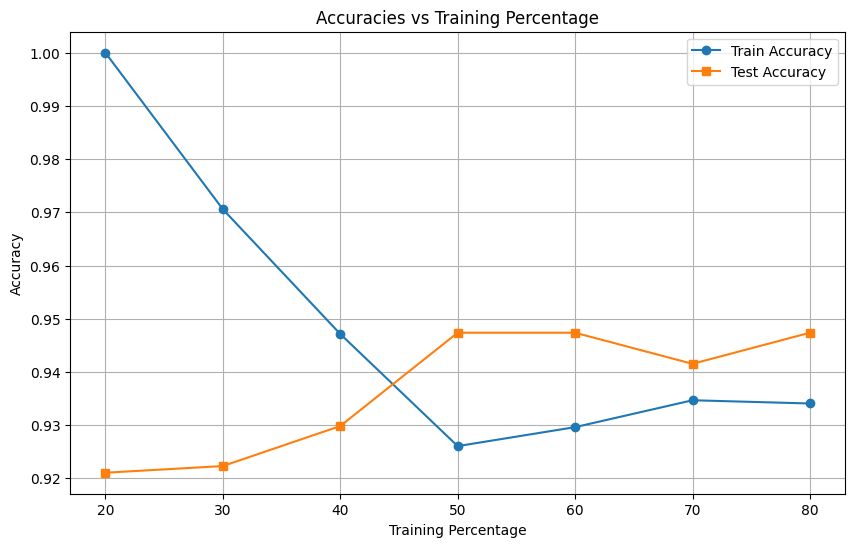

In [190]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame df as you described

# Plot the Train Accuracy and Test Accuracy against Training Percentage
plt.figure(figsize=(10, 6))
plt.plot(df['Training percentage'], df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(df['Training percentage'], df['Test Accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracies vs Training Percentage')
plt.legend()
plt.grid(True)
plt.show()


3.4 Ans.
The results show that the best test/train split is 60/40, with a training accuracy of 0.929619 and a test accuracy of 0.947368. This means that the model was able to learn the training data well, and it was also able to generalize well to the unseen test data.

80/20 is also a good fit with Train accuracy 0.934066 and Test Accuracy 0.947368 but for just slight increse in Training accuracy as compared to 60/40 ,it is more near to overfitting and may have not genralized well as 60/40 also the testing accuracy of 60/40 and 80/20 are same which shows that 60/40 is also able to generalize the unseen data well

In [195]:
!jupyter nbconvert --to html /Assignment_6_Decision_Tree_.ipynb

[NbConvertApp] Converting notebook /Assignment_6_Decision_Tree_.ipynb to html
[NbConvertApp] Writing 1603632 bytes to /Assignment_6_Decision_Tree_.html
